In [20]:
import re
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [21]:
with open('../lecture5/sentiment.txt') as f:
    sentiment = f.readlines()
    
text_processing = []
for i in sentiment:
    text_processing.append(i.strip().lower().split('\t'))

In [22]:
data = []
label = []

for i in range(len(text_processing)):
    data.append(re.sub(r'[^\w\s]', '', text_processing[i][0].strip()))
    label.append(int(text_processing[i][1]))
    

In [23]:
len(max(data))

57

In [24]:
data

['wow loved this place',
 'crust is not good',
 'not tasty and the texture was just nasty',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it',
 'the selection on the menu was great and so were the prices',
 'now i am getting angry and i want my damn pho',
 'honeslty it didnt taste that fresh',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer',
 'the fries were great too',
 'a great touch',
 'service was very prompt',
 'would not go back',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced',
 'i tried the cape cod ravoli chickenwith cranberrymmmm',
 'i was disgusted because i was pretty sure that was human hair',
 'i was shocked because no signs indicate cash only',
 'highly recommended',
 'waitress was a little slow in service',
 'this place is not worth your time let alone vegas',
 'did not like at all',
 'the burrittos blah',
 'the 

In [6]:
# Tiền xử lý dữ liệu
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(data)
X = pad_sequences(sequences, maxlen=len(max(data)))
y = np.array(label)

In [7]:
tokenizer.index_word.values()

dict_values(['the', 'and', 'i', 'was', 'a', 'to', 'is', 'this', 'it', 'of', 'food', 'not', 'for', 'in', 'place', 'good', 'service', 'we', 'very', 'my', 'with', 'great', 'had', 'that', 'be', 'so', 'were', 'are', 'but', 'have', 'back', 'you', 'they', 'here', 'on', 'at', 'like', 'go', 'all', 'time', 'our', 'will', 'as', 'really', 'just', 'there', 'an', 'their', 'if', 'best', 'would', 'ever', 'dont', 'also', 'only', 'never', 'friendly', 'one', 'up', 'no', 'your', 'restaurant', 'out', 'nice', 'again', 'from', 'been', 'what', 'amazing', 'delicious', 'did', 'by', 'vegas', 'which', 'im', 'some', 'came', 'its', 'when', 'ive', 'experience', 'pretty', 'staff', 'get', 'eat', 'us', 'minutes', 'love', 'even', 'or', 'disappointed', 'wont', 'he', 'me', 'bad', 'much', 'definitely', 'got', 'well', 'going', 'made', 'first', 'more', 'about', 'could', 'say', 'think', 'chicken', 'better', 'menu', 'too', 'salad', 'has', 'stars', 'always', 'than', 'how', 'can', 'pizza', 'fresh', 'being', 'because', 'worst', '

In [8]:
X

array([[  0,   0,   0, ..., 162,   8,  15],
       [  0,   0,   0, ...,   7,  12,  16],
       [  0,   0,   0, ...,   4,  45, 425],
       ...,
       [  0,   0,   0, ...,  12,  38,  31],
       [  0,   0,   0, ..., 136, 157,  40],
       [  0,   0,   0, ..., 347,   1, 275]], dtype=int32)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=0)

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# X_val = np.array(X_val)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
# y_val = np.array(y_val).reshape(-1, 1)


In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# , X_val.shape, y_val.shape

((700, 57), (700, 1), (300, 57), (300, 1))

In [13]:
model = tf.keras.Sequential([ 
    tf.keras.Input(shape=(X_train.shape[1],)), 
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=X_train.shape[1]), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout = 0.2, return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Dense(16, activation='ReLU', kernel_regularizer=tf.keras.regularizers.l2(0.01)), 
    tf.keras.layers.Dense(1, activation='sigmoid') 
]) 
  

In [14]:
# model = tf.keras.Sequential()
# model.add(tf.keras.Input(shape=(X_train.shape[1],)))
# model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=X_train.shape[1]))

# model.add(tf.keras.layers.LSTM(100))
# # model.add(tf.keras.layers.Dense(64, activation='relu'))
# # model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 57, 100)           208100    
                                                                 
 bidirectional (Bidirectiona  (None, 57, 64)           34048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 57, 32)           10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 57, 16)            528       
                                                                 
 dense_1 (Dense)             (None, 57, 1)             17        
                                                                 
Total params: 253,061
Trainable params: 253,061
Non-trai

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
22/22 [==============================] - 12s 221ms/step - loss: 0.8851 - accuracy: 0.5035 - val_loss: 0.8659 - val_accuracy: 0.4811
Epoch 2/50
22/22 [==============================] - 3s 131ms/step - loss: 0.8474 - accuracy: 0.5368 - val_loss: 0.8289 - val_accuracy: 0.6065
Epoch 3/50
22/22 [==============================] - 2s 100ms/step - loss: 0.7290 - accuracy: 0.7262 - val_loss: 0.7943 - val_accuracy: 0.6605
Epoch 4/50
22/22 [==============================] - 1s 62ms/step - loss: 0.4721 - accuracy: 0.8760 - val_loss: 0.7742 - val_accuracy: 0.7333
Epoch 5/50
22/22 [==============================] - 1s 63ms/step - loss: 0.2905 - accuracy: 0.9545 - val_loss: 0.8842 - val_accuracy: 0.7367
Epoch 6/50
22/22 [==============================] - 1s 48ms/step - loss: 0.2571 - accuracy: 0.9555 - val_loss: 0.9144 - val_accuracy: 0.7511
Epoch 7/50
22/22 [==============================] - 1s 39ms/step - loss: 0.1704 - accuracy: 0.9829 - val_loss: 0.9769 - val_accuracy: 0.7595
Epoch 8/5

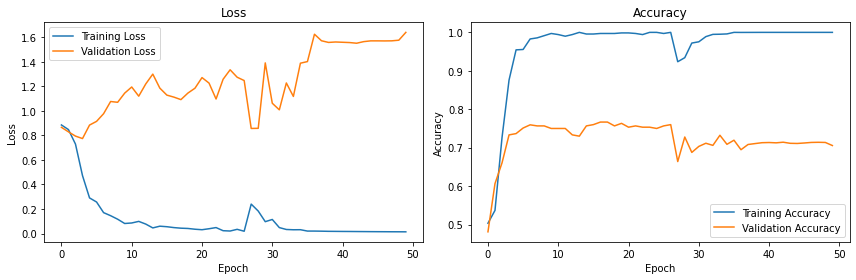

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Vẽ đồ thị accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Đánh giá mô hình trên tập validation
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


NameError: name 'X_val' is not defined